### Se pide:

A partir del archivo "USA_Housing.csv", realizar la regresión lineal entre cada columna numérica con la columna 'price'. 

Cuando existe una columna(variable) que es la que se quiere comparar, se le llama 'target'. 

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import seaborn as sns


df = pd.read_csv("../data/USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\r\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\r\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\r\nJoshualand, VA ..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\r\nFPO AE 73316


# Regresión en función de AVG. AREA INCOME

In [199]:
X_income = df['Avg. Area Income']
y = df['Price']

In [200]:
# Se parte el conjunto en "train" y "test".
X_income_train, X_income_test, y_income_train, y_income_test = train_test_split(X_income, y, test_size=0.2)

In [201]:
X_income_train = np.array(X_income_train)
X_income_test = np.array(X_income_test)

In [202]:
print(X_income_train.shape)
print(X_income_test.shape)

(4000,)
(1000,)


In [203]:
X_income_train = X_income_train.reshape(-1, 1)
X_income_test = X_income_test.reshape(-1, 1)

In [204]:
print(X_income_train.shape)
print(X_income_test.shape)

(4000, 1)
(1000, 1)


In [205]:
# Se crea la variable que representa el modelo
reglin_income = LinearRegression()

In [206]:
# Se entrena el modelo con el conjunto "train"
reglin_income.fit(X_income_train, y_income_train)

LinearRegression()

In [207]:
print("Secante (income):", reglin_income.intercept_)
print("Pendiente (income):", reglin_income.coef_)

Secante (income): -235526.4556304682
Pendiente (income): [21.42779897]


In [208]:
print("Score TRAIN (income):", reglin_income.score(X_income_train, y_income_train) *100)
print("Score TEST (income):", reglin_income.score(X_income_test, y_income_test) *100)

Score TRAIN (income): 41.13231145042775
Score TEST (income): 39.978694427968875


In [209]:
income_predictions = reglin_income.predict(X_income_test)

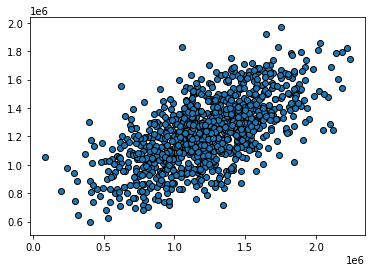

In [210]:
plt.scatter(y_income_test, income_predictions, edgecolor='black')

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

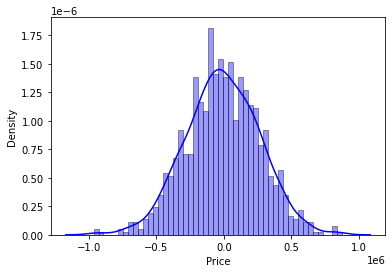

In [211]:
sns.distplot((y_income_test - income_predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

In [212]:
print('MAE (income):', metrics.mean_absolute_error(y_income_test, income_predictions))
print('MSE (income):', metrics.mean_squared_error(y_income_test, income_predictions))
print('RMSE (income):', np.sqrt(metrics.mean_squared_error(y_income_test, income_predictions)))

MAE (income): 216503.63877998182
MSE (income): 74303934117.01097
RMSE (income): 272587.47975101677


# Regresión en función de AVG. AREA HOUSE AGE

In [213]:
X_age = df['Avg. Area House Age']
y = df['Price']

In [214]:
# Se parte el conjunto en "train" y "test".
X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(X_age, y, test_size=0.2)

In [215]:
X_age_train = np.array(X_age_train)
X_age_test = np.array(X_age_test)

In [216]:
print(X_age_train.shape)
print(X_age_test.shape)

(4000,)
(1000,)


In [217]:
X_age_train = X_age_train.reshape(-1, 1)
X_age_test = X_age_test.reshape(-1, 1)

In [218]:
print(X_age_train.shape)
print(X_age_test.shape)

(4000, 1)
(1000, 1)


In [219]:
# Se crea la variable que representa el modelo
reglin_age = LinearRegression()

In [220]:
# Se entrena el modelo con el conjunto "train"
reglin_age.fit(X_age_train, y_age_train)

LinearRegression()

In [221]:
print("Secante (age):", reglin_age.intercept_)
print("Pendiente (age):", reglin_age.coef_)

Secante (age): 261299.1583925184
Pendiente (age): [162191.99382969]


In [222]:
print("Score TRAIN (age):", reglin_age.score(X_age_train, y_age_train) *100)
print("Score TEST (age):", reglin_age.score(X_age_test, y_age_test) *100)

Score TRAIN (age): 20.693700244152392
Score TEST (age): 19.448510964954615


In [223]:
age_predictions = reglin_age.predict(X_age_test)

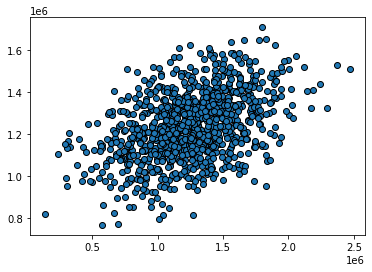

In [224]:
plt.scatter(y_age_test, age_predictions, edgecolor='black')

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

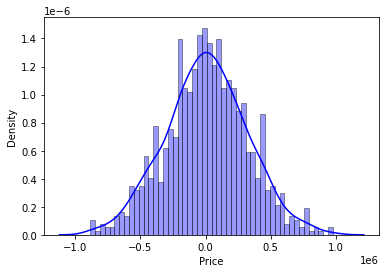

In [225]:
sns.distplot((y_age_test - age_predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

In [226]:
print('MAE (age):', metrics.mean_absolute_error(y_age_test, age_predictions))
print('MSE (age):', metrics.mean_squared_error(y_age_test, age_predictions))
print('RMSE (age):', np.sqrt(metrics.mean_squared_error(y_age_test, age_predictions)))

MAE (age): 247666.7817157269
MSE (age): 98019128426.0688
RMSE (age): 313080.06711713347


# Regresión en función de AVG. AREA NUMBER OF ROOMS

In [227]:
X_rooms = df['Avg. Area Number of Rooms']
y = df['Price']

In [228]:
# Se parte el conjunto en "train" y "test".
def regresion_lineal(X, y):
    global predictions
    global y_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    print("Shape X_train:", X_train.shape)
    print("Shape X_test:", X_test.shape)
    print('')
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)
    print("Shape X_train:", X_train.shape)
    print("Shape X_test:", X_test.shape)
    print('')
    # Se crea la variable que representa el modelo
    reglin = LinearRegression()
    # Se entrena el modelo con el conjunto "train"
    reglin.fit(X_train, y_train)
    print("Secante:", reglin.intercept_)
    print("Pendiente:", reglin.coef_)
    print('')
    print("Score TRAIN:", reglin.score(X_train, y_train) *100)
    print("Score TEST:", reglin.score(X_test, y_test) *100)
    predictions = reglin.predict(X_test)
    print('')
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('=============================================================================================================================')
    return y_test, predictions

In [229]:
regresion_lineal(X_rooms, y)

Shape X_train: (4000,)
Shape X_test: (1000,)

Shape X_train: (4000, 1)
Shape X_test: (1000, 1)

Secante: 411403.0085987153
Pendiente: [117794.7523995]

Score TRAIN: 11.240132936232516
Score TEST: 11.3136770289893

MAE: 265065.0126799476
MSE: 107287077214.0184
RMSE: 327547.0610675944


(3219    1.309923e+06
 3582    1.404622e+06
 379     9.464792e+05
 4031    1.175289e+06
 2367    1.205568e+06
             ...     
 4828    1.735417e+06
 143     1.604921e+06
 4933    8.801328e+05
 3099    1.184614e+06
 2906    7.707706e+05
 Name: Price, Length: 1000, dtype: float64,
 array([1289057.38024659, 1284385.17433076, 1002133.85805604,
        1167654.54739503, 1318884.41098847, 1127122.37005627,
        1084308.01191   , 1178916.31416099, 1238411.39087741,
        1105733.80466232, 1345862.54849183, 1230676.77404843,
        1321735.81584948, 1192244.66016125, 1235201.08960994,
        1043876.30817725, 1236519.16486127, 1257630.14955104,
        1342042.56236333, 1349027.47489798, 1261559.36123312,
        1237041.57582292, 1176231.75219001, 1051151.43389021,
        1277228.0193554 , 1209019.45092893, 1333945.75148551,
        1144999.5388767 , 1348789.44584076, 1187996.13381297,
        1258291.39985373, 1200598.67650002, 1250633.99664518,
        1225605.51275634,  97063

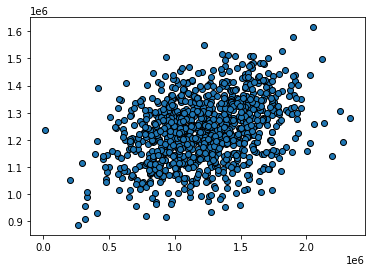

In [230]:
plt.scatter(y_test, predictions, edgecolor='black')

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

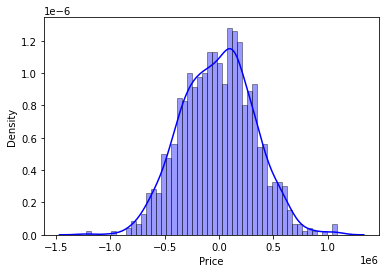

In [231]:
sns.distplot((y_test - predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

# Regresión en función de AVG. AREA NUMBER OF BEDROOMS

In [232]:
X_bedrooms = df['Avg. Area Number of Bedrooms']
y = df['Price']

In [240]:
regresion_lineal(X_bedrooms, y)

Shape X_train: (4000,)
Shape X_test: (1000,)

Shape X_train: (4000, 1)
Shape X_test: (1000, 1)

Secante: 1036611.0879524214
Pendiente: [49108.5336466]

Score TRAIN: 2.969111939419178
Score TEST: 2.7555482556159028

MAE: 280679.63242145226
MSE: 122929691026.38681
RMSE: 350613.30697277706


(2105    1.315138e+06
 927     1.626942e+06
 4166    1.220591e+06
 4142    1.296433e+06
 76      9.415943e+05
             ...     
 3779    1.286477e+06
 337     1.236932e+06
 904     1.436995e+06
 2970    6.984577e+05
 2362    1.528901e+06
 Name: Price, Length: 1000, dtype: float64,
 array([1147596.37399374, 1249251.0386422 , 1208490.95571552,
        1255635.14801625, 1205053.35836026, 1153489.39803133,
        1256617.31868919, 1294921.97493353, 1156926.99538659,
        1143667.69130201, 1204562.27302379, 1204562.27302379,
        1241393.67325874, 1238938.24657641, 1355816.55665532,
        1197195.9929768 , 1205544.44369672, 1241393.67325874,
        1236973.90523055, 1252688.63599746, 1249742.12397866,
        1285100.26820421, 1284118.09753128, 1191794.05427568,
        1252688.63599746, 1199651.41965913, 1242866.92926814,
        1201124.67566853, 1306216.93767225, 1208490.95571552,
        1192285.13961214, 1245813.44128693, 1199160.33432267,
        1337646.39920608, 125268

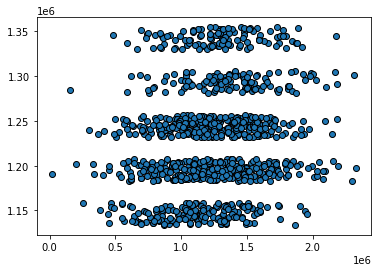

In [234]:
plt.scatter(y_test, predictions, edgecolor='black')

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

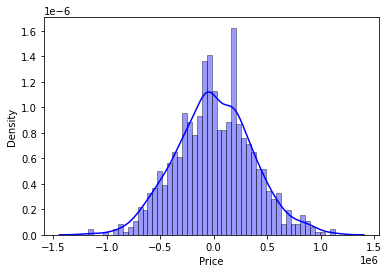

In [235]:
sns.distplot((y_test - predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

# Regresión en función de AVG. AREA POPULATION

In [236]:
X_population = df['Area Population']
y = df['Price']

In [237]:
regresion_lineal(X_population, y)

Shape X_train: (4000,)
Shape X_test: (1000,)

Shape X_train: (4000, 1)
Shape X_test: (1000, 1)

Secante: 712726.2122770925
Pendiente: [14.43706372]

Score TRAIN: 16.576412422664845
Score TEST: 17.068391438679587

MAE: 262779.921725826
MSE: 109562811134.068
RMSE: 331002.73584076005


(1548    1.394424e+06
 3563    1.348222e+06
 615     1.129976e+06
 4794    1.545508e+06
 3391    9.143250e+05
             ...     
 3354    8.590786e+05
 1018    1.230391e+06
 967     1.489540e+06
 4568    1.036338e+06
 4361    1.742566e+06
 Name: Price, Length: 1000, dtype: float64,
 array([1347545.76370211, 1080977.25234639, 1044600.64342692,
        1485036.14995258, 1126064.58044191, 1291418.60964729,
        1225983.82592246, 1366424.38763124, 1515442.09867259,
        1130074.10320672, 1321476.73351393, 1203119.67036243,
        1185245.48576533, 1004565.65169766, 1113383.38997586,
        1043058.11657351, 1451114.46502057, 1130747.02839803,
        1044125.8990555 ,  905396.97720967, 1357443.33497718,
         948763.042253  , 1159666.63159634, 1304828.03511849,
        1416023.30068543, 1373177.6020244 , 1148507.24831846,
        1347201.67258752, 1262261.15981578, 1244260.91105683,
        1330341.36261845, 1193015.09477532, 1352524.6838061 ,
        1251012.69985965, 126195

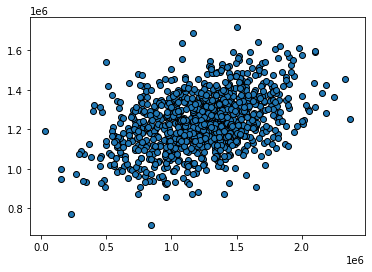

In [238]:
plt.scatter(y_test, predictions, edgecolor='black')

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

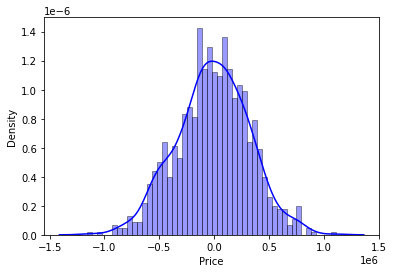

In [239]:
sns.distplot((y_test - predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')